**Business Problem** - 
Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

In [1]:
# Import module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

In [2]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
To: /content/walmart_data.csv?1641285094
100% 23.0M/23.0M [00:00<00:00, 33.9MB/s]


In [3]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094')
df

User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                               2               0                 3      8370  
1                               2               0                 1     15200  
2                               2               0                12      1422  
3                               2               0                12      1057  
4                              4+               0                 8      7969  
...                           ...             ...               ...       ...  
550063                          1               1                20       368  
550064                          3               0                20       371  
550065                         4+               1                20       137  
550066                          2               0                20       365  
550067                         4+               1                20       490  

[550068 rows x 10 columns]

In [4]:
df.shape

(550068, 10)

The dataset here has 550068 rowa & 10 columns means 550068*10 observed records.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


Her int he dataset User_ID is not gonna help us much we can remove it before we proceed further. 

In [6]:
df = df.drop(['User_ID'], axis=1)
df.head(2)

Product_ID Gender   Age  Occupation City_Category  \
0  P00069042      F  0-17          10             A   
1  P00248942      F  0-17          10             A   

  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                          2               0                 3      8370  
1                          2               0                 1     15200

In [7]:
df.dtypes

Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

We could see here the following
1. age in in object format
2. Occupation is in integer format
3. Stay_In_Current_City_Years in object format
4. Marital status in integer format

All these columns need to be in a proper/suitable format/datatypes.

In [8]:
print(df['Age'].min())
print(df['Age'].max())

0-17
55+


In [9]:
print(df['Age'].nunique())
print(df['Age'].unique())

7
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']


So now herein we have a clear idea about how the Age is stored in the dataframe. Similarly we can have alook into other variables that we poited out.

In [10]:
print(df['Occupation'].min())
print(df['Occupation'].max())

0
20


In [11]:
print(df['Occupation'].nunique())
print(df['Occupation'].unique())

21
[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]


In [12]:
df['Occupation'].astype(int)
print(df['Occupation'].dtypes)
print(df['Occupation'].unique())

int64
[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]


In [13]:
print(df['Stay_In_Current_City_Years'].min())
print(df['Stay_In_Current_City_Years'].max())
print(df['Stay_In_Current_City_Years'].nunique())
print(df['Stay_In_Current_City_Years'].unique())


df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.strip('+').astype(int)


print(df['Stay_In_Current_City_Years'].dtypes)
print(df['Stay_In_Current_City_Years'].nunique())
print(df['Stay_In_Current_City_Years'].unique())

0
4+
5
['2' '4+' '3' '1' '0']
int64
5
[2 4 3 1 0]


In [14]:
df.head(1)

Product_ID Gender   Age  Occupation City_Category  \
0  P00069042      F  0-17          10             A   

   Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                           2               0                 3      8370

In [15]:
for i in df:
  print(i, ': ', df[i].nunique())

Product_ID :  3631
Gender :  2
Age :  7
Occupation :  21
City_Category :  3
Stay_In_Current_City_Years :  5
Marital_Status :  2
Product_Category :  20
Purchase :  18105


In [16]:
df = df.drop(['Product_ID'], axis = 1)
for i in df:
  print(i, ': ', df[i].nunique())

Gender :  2
Age :  7
Occupation :  21
City_Category :  3
Stay_In_Current_City_Years :  5
Marital_Status :  2
Product_Category :  20
Purchase :  18105


In [17]:
print(df['Purchase'].min())
print(df['Purchase'].max())

12
23961


Now since the data is trasformed into a suitable format. Now let's recheck the dataframe.

In [18]:
df.shape

(550068, 8)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Gender                      550068 non-null  object
 1   Age                         550068 non-null  object
 2   Occupation                  550068 non-null  int64 
 3   City_Category               550068 non-null  object
 4   Stay_In_Current_City_Years  550068 non-null  int64 
 5   Marital_Status              550068 non-null  int64 
 6   Product_Category            550068 non-null  int64 
 7   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 33.6+ MB


Now, herein let's have a look into the key values in the dataframe.

In [20]:
for i in df:
  print(i , ': ', df[i].describe())
  print('***********')

Gender :  count     550068
unique         2
top            M
freq      414259
Name: Gender, dtype: object
***********
Age :  count     550068
unique         7
top        26-35
freq      219587
Name: Age, dtype: object
***********
Occupation :  count    550068.000000
mean          8.076707
std           6.522660
min           0.000000
25%           2.000000
50%           7.000000
75%          14.000000
max          20.000000
Name: Occupation, dtype: float64
***********
City_Category :  count     550068
unique         3
top            B
freq      231173
Name: City_Category, dtype: object
***********
Stay_In_Current_City_Years :  count    550068.000000
mean          1.858418
std           1.289443
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max           4.000000
Name: Stay_In_Current_City_Years, dtype: float64
***********
Marital_Status :  count    550068.000000
mean          0.409653
std           0.491770
min           0.000000
25%       

So herein the results we could see the where exacly our data is lying with respect to each one of our variables.

In [21]:
df.isnull().sum()

# for i in df:
#   print(i, ':', df[i].isnull().sum())

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

Now since herein we have got a clearity that the dataframe is ready to be checked for relative distributions.

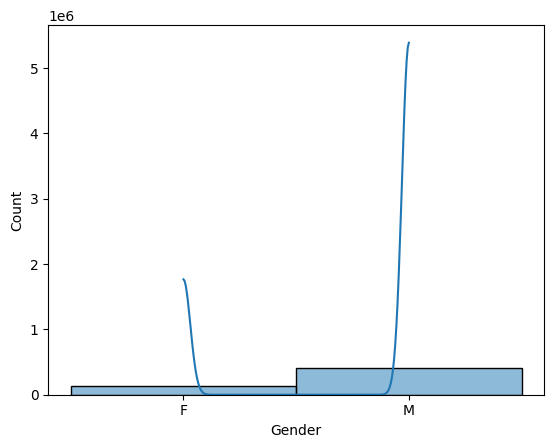

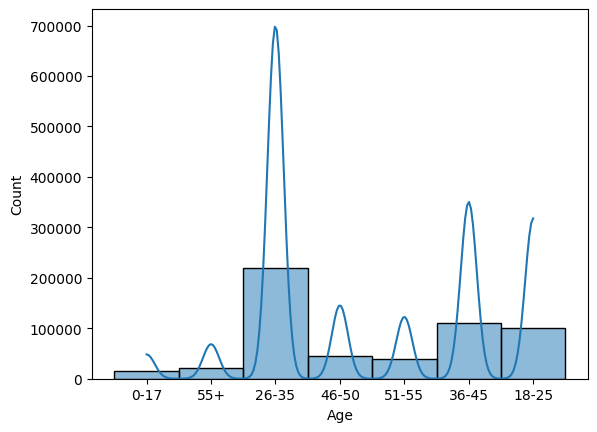

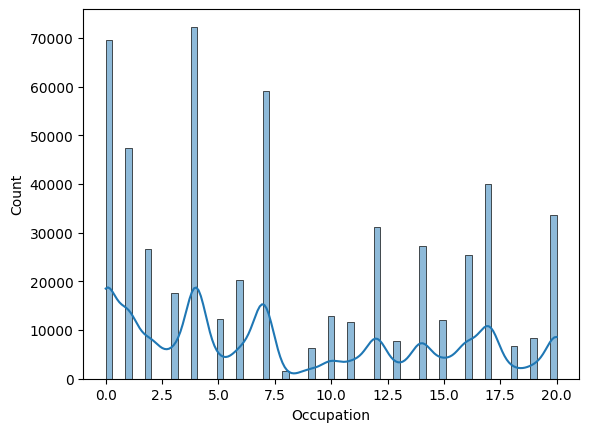

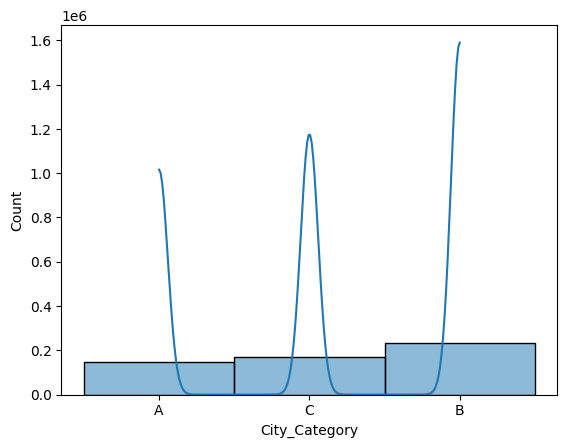

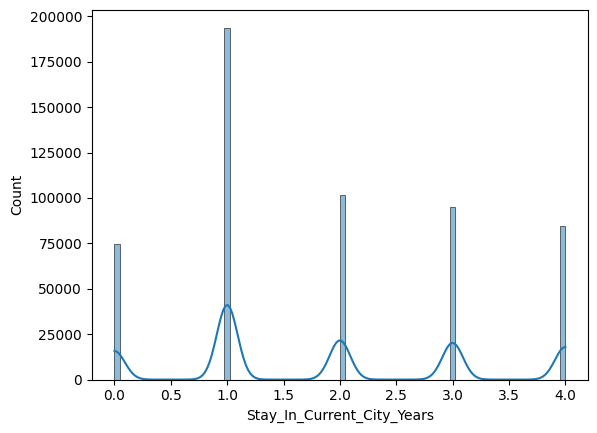

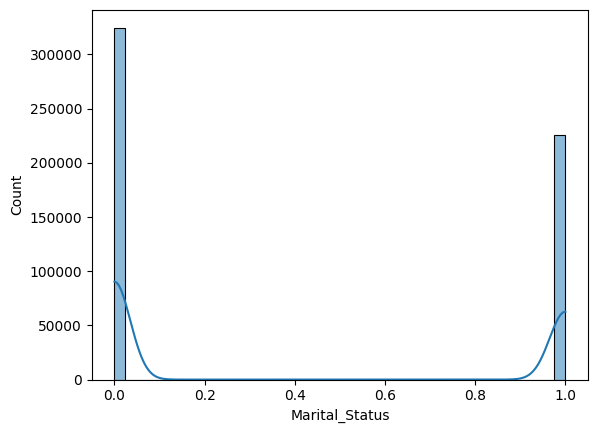

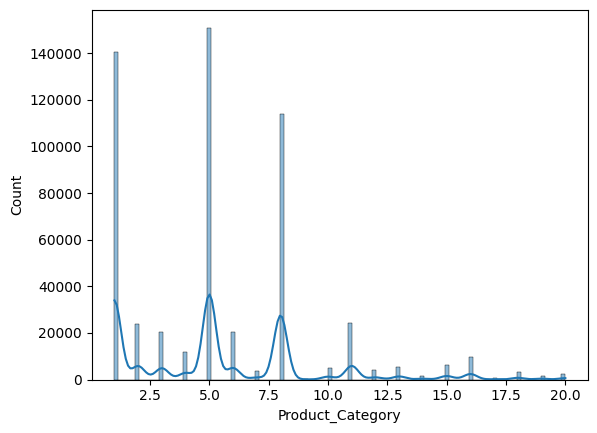

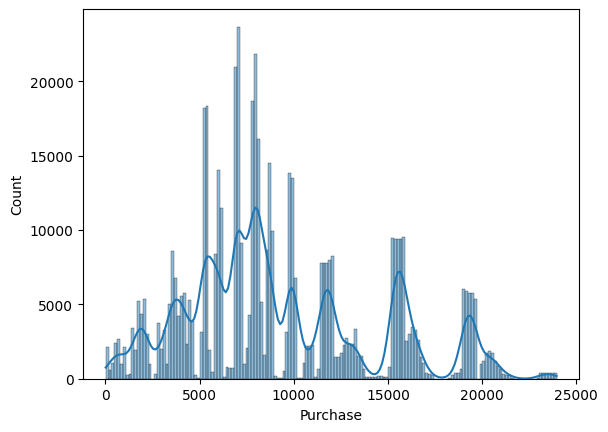

In [22]:
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.show()

0
20


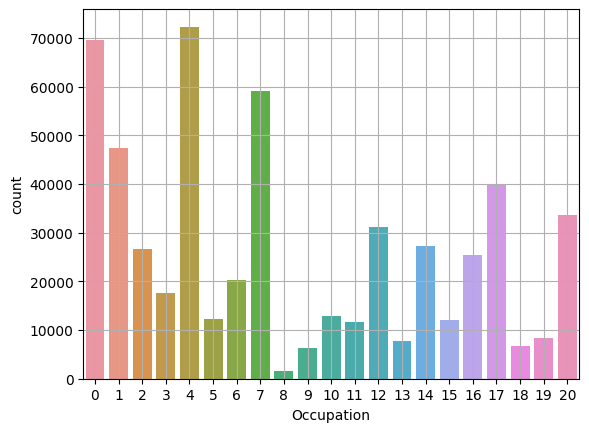

In [23]:
df['Occupation'].unique()
print(df['Occupation'].min())
print(df['Occupation'].max())
sns.countplot(df, x="Occupation")
plt.grid()
plt.show()

In [24]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [25]:
df['Stay_In_Current_City_Years'].unique()

array([2, 4, 3, 1, 0])

1
20
[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]


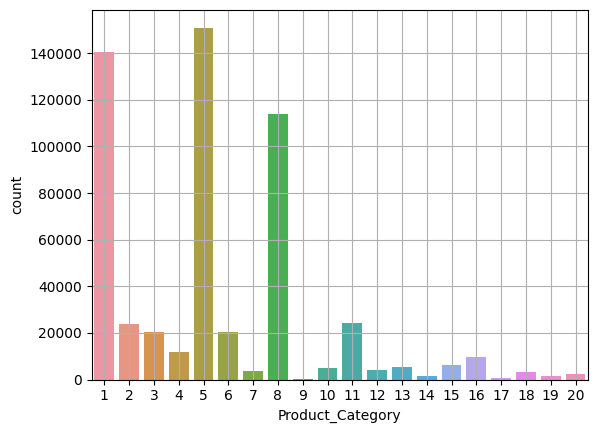

In [26]:
print(df['Product_Category'].min())
print(df['Product_Category'].max())
print(df['Product_Category'].unique())

sns.countplot(df, x="Product_Category")
plt.grid()
plt.show()

In [27]:
print(df['Purchase'].min())
print(df['Purchase'].max())
print(df['Purchase'].unique())

12
23961
[ 8370 15200  1422 ...   135   123   613]


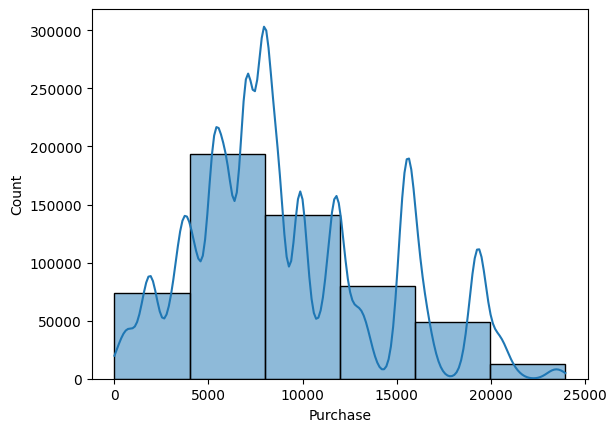

In [28]:

sns.histplot(df, x="Purchase", bins= 6, kde = True)
plt.show()

##The following are the key observaations.##
1. Gender - Transaction made by Male are more than Females.
2. Age - Mostly teh shopping is being done by the age group of 18 - 45.
3. Occupation - Those who haave 8, 9, 13, 18 &  19 have maade least number of transactions.
4. City_Category - City_Category **B** has highest traansactions & **A** has the lowest.
5. Stay_In_Current_City_Years - Those who have lived 1 year have made highest number fo transacions.
6. Marital_Status - Those who are unmarried are greater in number with respect to number of transactions.
7. Product_Category - Product_Category 1, 5 & 8 are performing extraordinary in h emarket in comparison to any other product in the market.
8. Purchase - Least number of transaction were done in the range of above 20k. Highest number of transactions were done at the range 0f 2.5 k to 7.5k.


<ipython-input-29-7cbd126abdd6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')


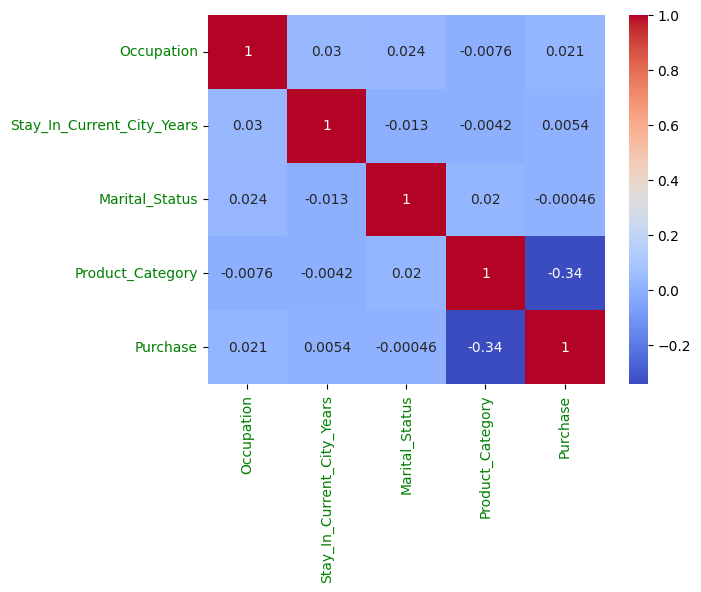

In [29]:
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.xticks(rotation = 90, color  = 'green')
plt.yticks(rotation = 0, color = 'green')
plt.show()

The correlation factors are only to provide inference about the integr vaalues.We could eeaisly have a look into the variables that some variables are poorly correlated to each other & vise versa.

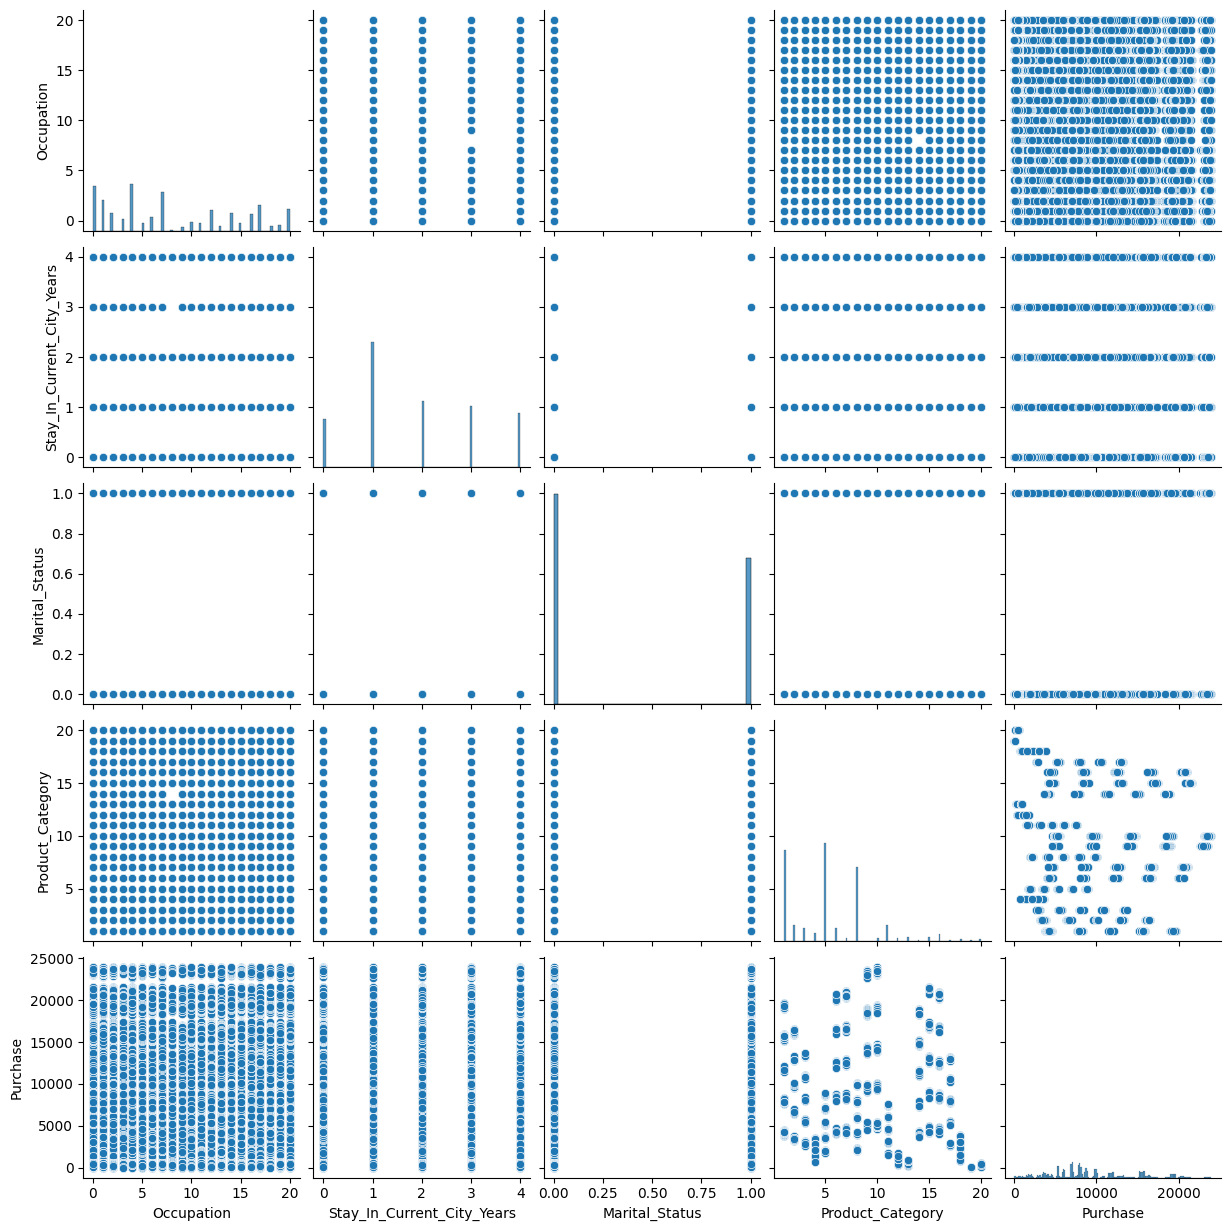

In [30]:
sns.pairplot(df)
plt.show()

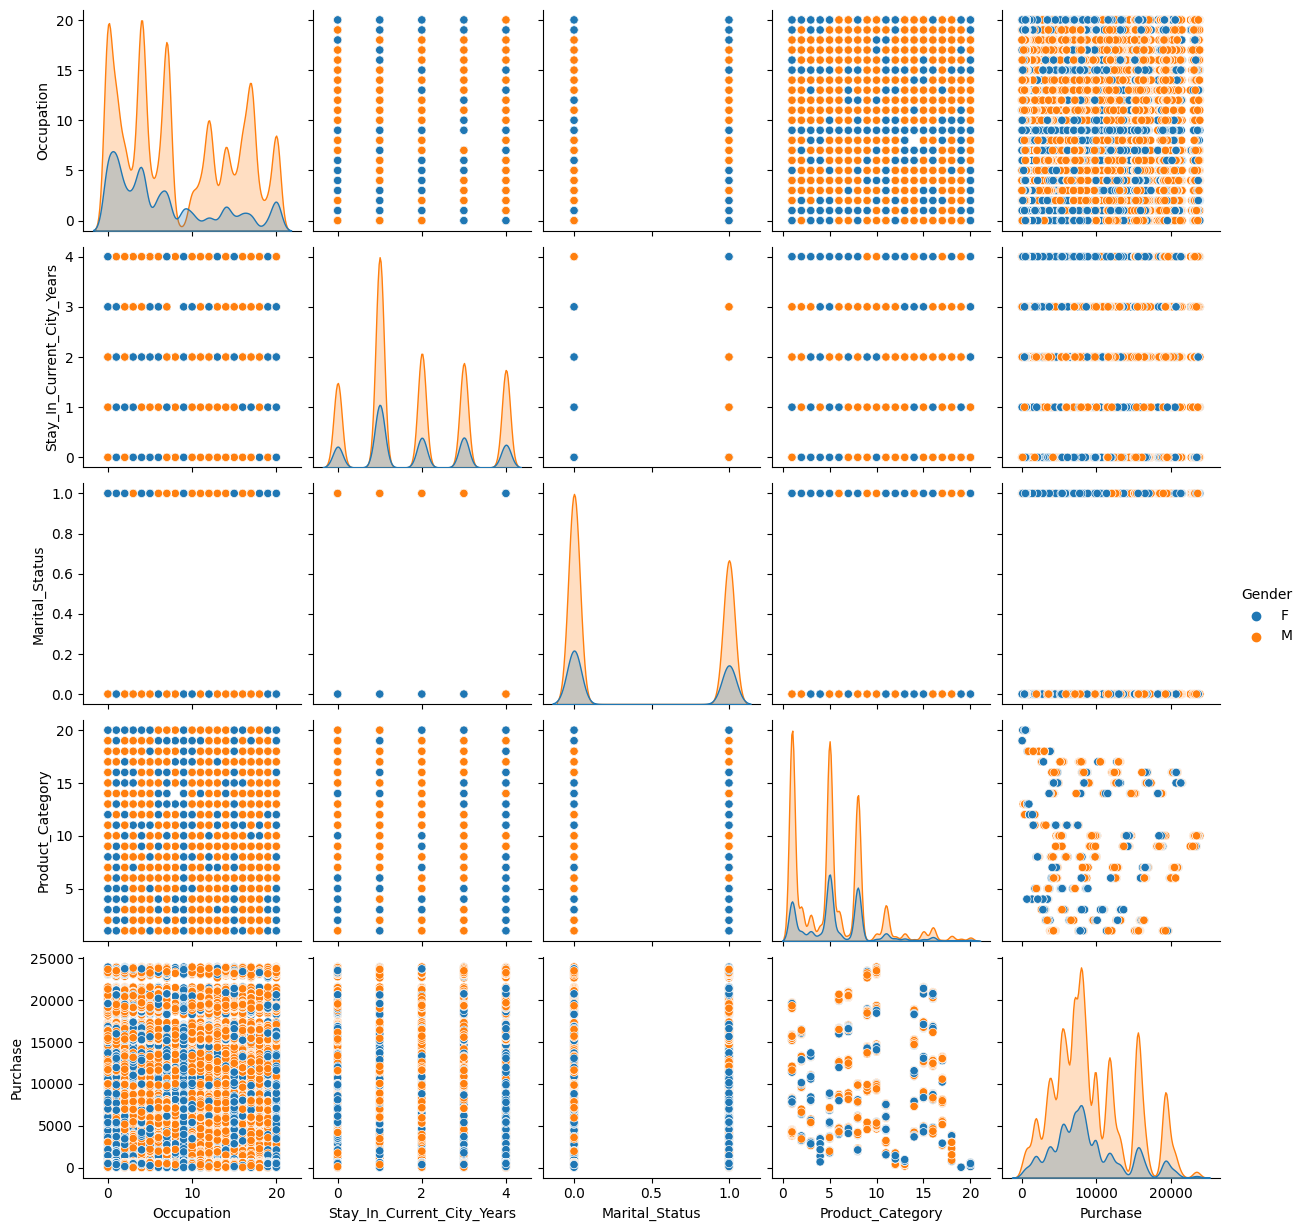

In [31]:
sns.pairplot(df, hue = 'Gender')
plt.show()

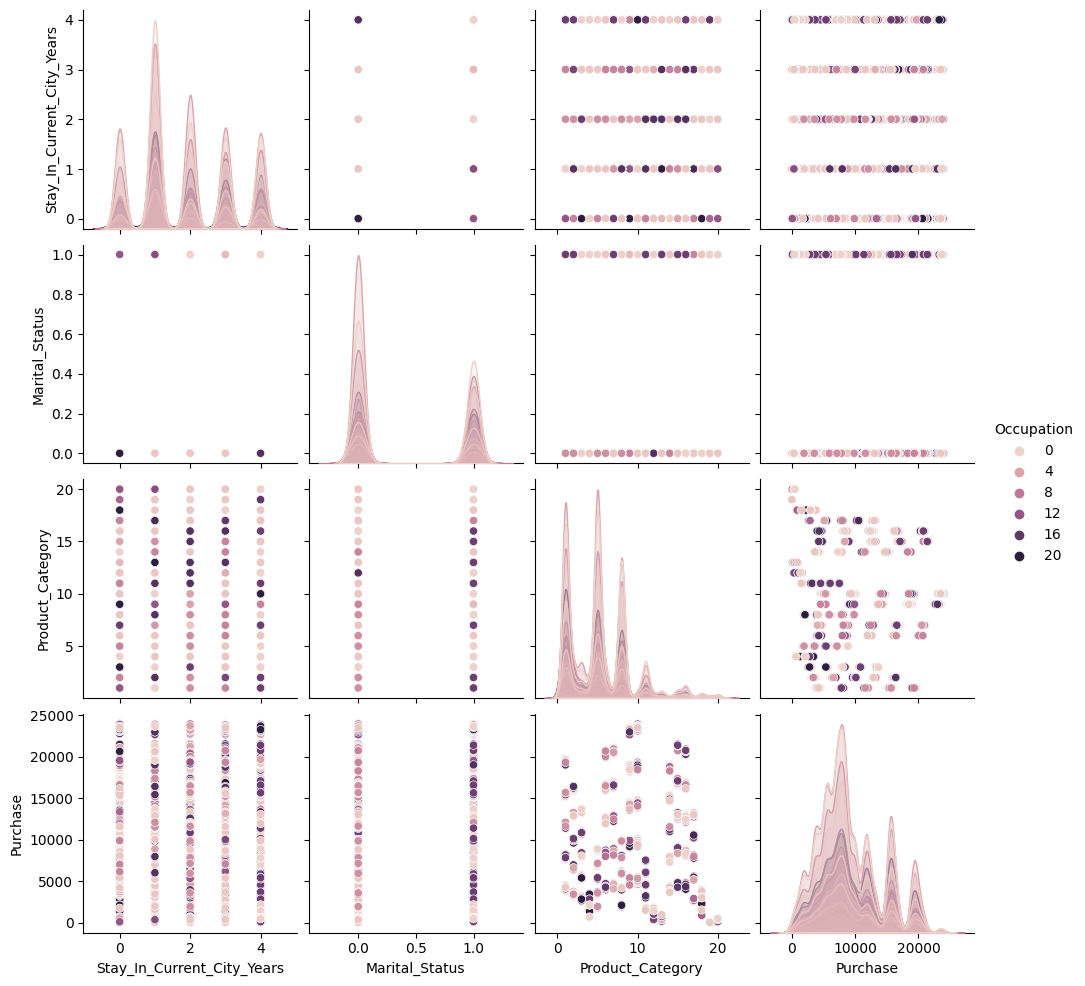

In [32]:
sns.pairplot(df, hue = 'Occupation')
plt.show()

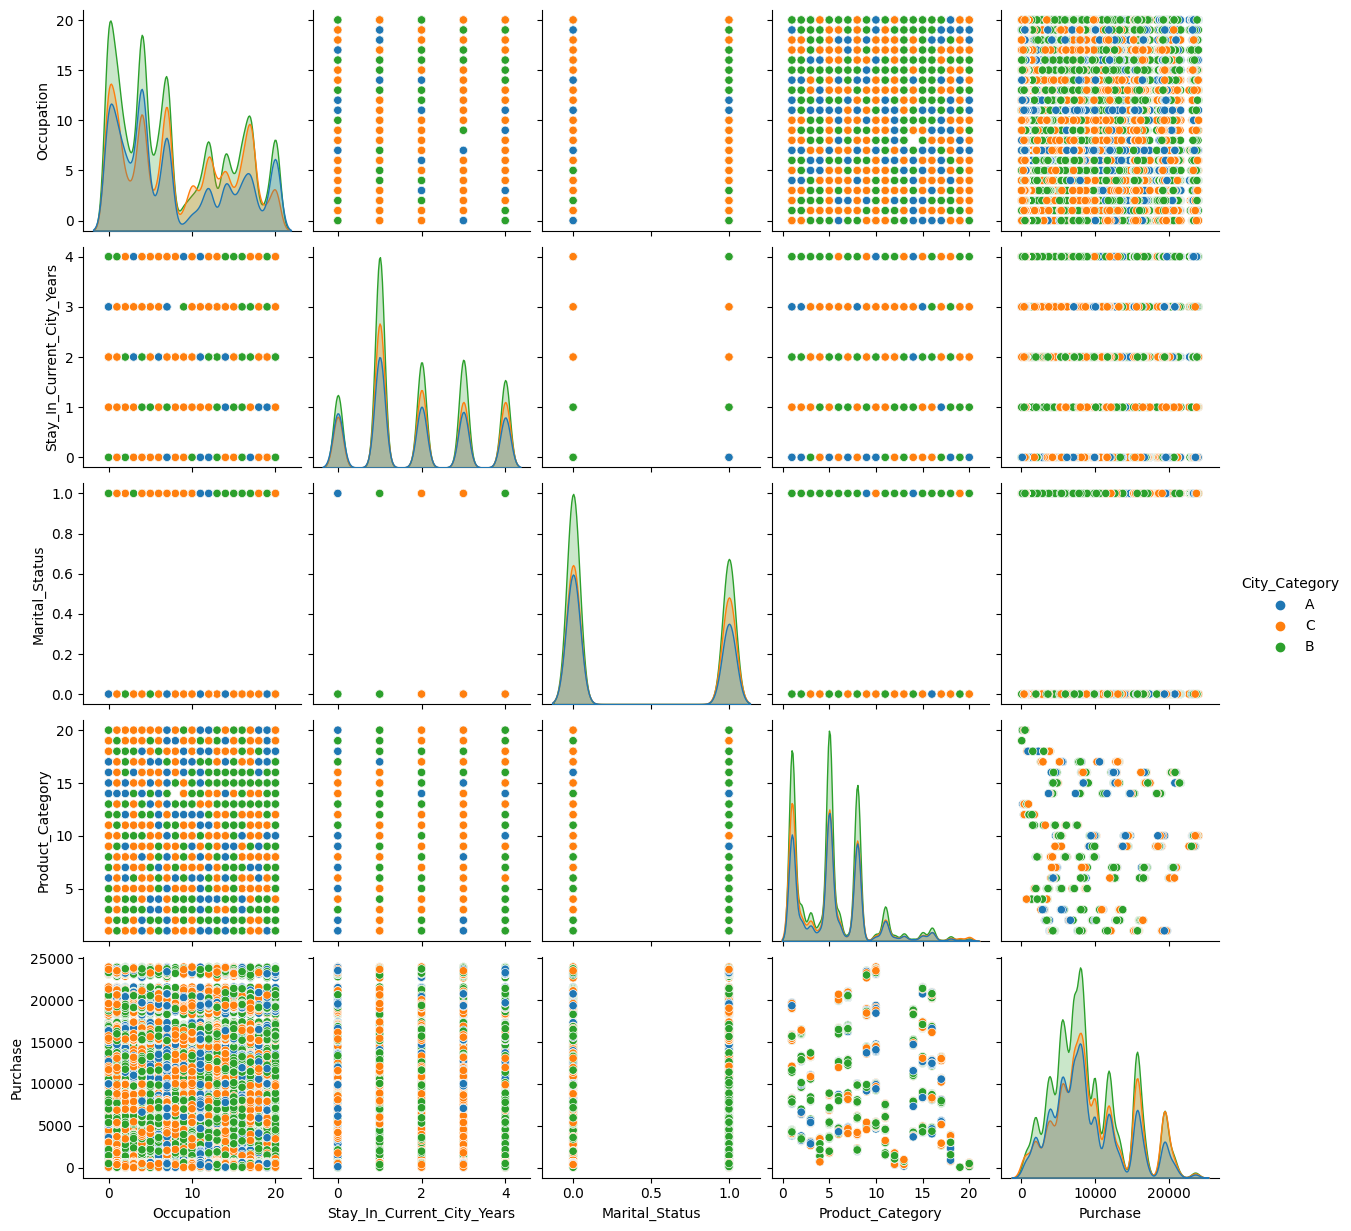

In [33]:
sns.pairplot(df, hue = 'City_Category')
plt.show()

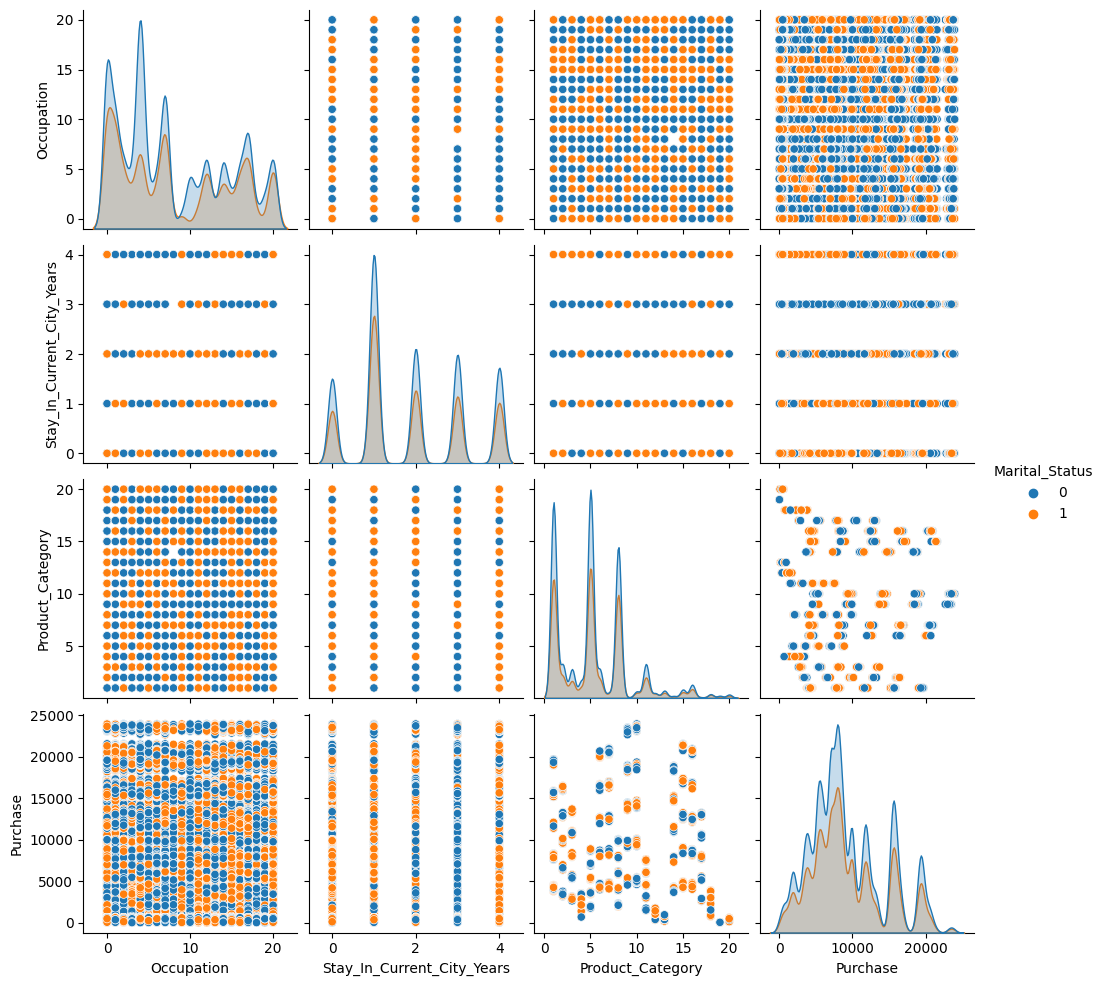

In [34]:
sns.pairplot(df, hue = 'Marital_Status')
plt.show()

In [35]:
A = pd.crosstab(columns = df['Marital_Status'], index = df['Gender'], margins = True, normalize = True)
print(A)
print('*'*100)

A = pd.crosstab(columns = df['Marital_Status'], index = df['Gender'], margins = True, normalize = 'index')
print(A)
print('*'*100)

A = pd.crosstab(columns = df['Marital_Status'], index = df['Gender'], margins = True, normalize = 'columns')
print(A)
print('*'*100)

Marital_Status         0         1       All
Gender                                      
F               0.143293  0.103602  0.246895
M               0.447054  0.306051  0.753105
All             0.590347  0.409653  1.000000
****************************************************************************************************
Marital_Status         0         1
Gender                            
F               0.580381  0.419619
M               0.593614  0.406386
All             0.590347  0.409653
****************************************************************************************************
Marital_Status         0         1       All
Gender                                      
F               0.242727  0.252901  0.246895
M               0.757273  0.747099  0.753105
****************************************************************************************************


In [36]:
A = pd.crosstab(columns = df['Gender'], index = df['Stay_In_Current_City_Years'], margins = True, normalize = True)
print(A)
print('*'*100)

A = pd.crosstab(columns = df['Gender'], index = df['Stay_In_Current_City_Years'], margins = True, normalize = 'index')
print(A)
print('*'*100)

A = pd.crosstab(columns = df['Gender'], index = df['Stay_In_Current_City_Years'], margins = True, normalize = 'columns')
print(A)
print('*'*100)

Gender                             F         M       All
Stay_In_Current_City_Years                              
0                           0.031020  0.104233  0.135252
1                           0.093258  0.259101  0.352358
2                           0.044235  0.140903  0.185137
3                           0.044576  0.128648  0.173224
4                           0.033807  0.120221  0.154028
All                         0.246895  0.753105  1.000000
****************************************************************************************************
Gender                             F         M
Stay_In_Current_City_Years                    
0                           0.229348  0.770652
1                           0.264667  0.735333
2                           0.238928  0.761072
3                           0.257333  0.742667
4                           0.219484  0.780516
All                         0.246895  0.753105
*******************************************************************

In [37]:
A = pd.crosstab(columns = df['Gender'], index = df['City_Category'], margins = True, normalize = True)
print(A)
print('*'*100)

A = pd.crosstab(columns = df['Gender'], index = df['City_Category'], margins = True, normalize = 'index')
print(A)
print('*'*100)

A = pd.crosstab(columns = df['Gender'], index = df['City_Category'], margins = True, normalize = 'columns')
print(A)
print('*'*100)

Gender                F         M       All
City_Category                              
A              0.064908  0.203640  0.268549
B              0.105071  0.315192  0.420263
C              0.076916  0.234273  0.311189
All            0.246895  0.753105  1.000000
****************************************************************************************************
Gender                F         M
City_Category                    
A              0.241701  0.758299
B              0.250012  0.749988
C              0.247168  0.752832
All            0.246895  0.753105
****************************************************************************************************
Gender                F         M       All
City_Category                              
A              0.262899  0.270401  0.268549
B              0.425568  0.418523  0.420263
C              0.311533  0.311076  0.311189
****************************************************************************************************


In [38]:
A = pd.crosstab(columns = df['Gender'], index = df['Occupation'], margins = True, normalize = True)
print(A)
print('*'*100)

A = pd.crosstab(columns = df['Gender'], index = df['Occupation'], margins = True, normalize = 'index')
print(A)
print('*'*100)

A = pd.crosstab(columns = df['Gender'], index = df['Occupation'], margins = True, normalize = 'columns')
print(A)
print('*'*100)

Gender             F         M       All
Occupation                              
0           0.032927  0.093672  0.126599
1           0.032694  0.053524  0.086218
2           0.015687  0.032649  0.048336
3           0.014396  0.017691  0.032087
4           0.032425  0.099028  0.131453
5           0.004036  0.018101  0.022137
6           0.014835  0.022170  0.037005
7           0.018230  0.089271  0.107501
8           0.000656  0.002154  0.002811
9           0.010622  0.000814  0.011437
10          0.007277  0.016229  0.023506
11          0.002727  0.018336  0.021063
12          0.006306  0.050376  0.056682
13          0.002723  0.011326  0.014049
14          0.012295  0.037352  0.049647
15          0.004345  0.017771  0.022115
16          0.007466  0.038657  0.046123
17          0.007143  0.065654  0.072796
18          0.000418  0.011620  0.012039
19          0.003667  0.011715  0.015382
20          0.016018  0.044996  0.061014
All         0.246895  0.753105  1.000000
****************

In [39]:
A = pd.crosstab(columns = df['Gender'], index = df['Product_Category'], margins = True, normalize = True)
print(A)
print('*'*100)

A = pd.crosstab(columns = df['Gender'], index = df['Product_Category'], margins = True, normalize = 'index')
print(A)
print('*'*100)

A = pd.crosstab(columns = df['Gender'], index = df['Product_Category'], margins = True, normalize = 'columns')
print(A)
print('*'*100)

Gender                   F         M       All
Product_Category                              
1                 0.045142  0.210059  0.255201
2                 0.010286  0.033098  0.043384
3                 0.010919  0.025828  0.036746
4                 0.006616  0.014751  0.021366
5                 0.076283  0.198106  0.274390
6                 0.008288  0.028918  0.037206
7                 0.001714  0.005050  0.006765
8                 0.061007  0.146104  0.207111
9                 0.000127  0.000618  0.000745
10                0.002112  0.007205  0.009317
11                0.008615  0.035537  0.044153
12                0.002785  0.004390  0.007175
13                0.002658  0.007430  0.010088
14                0.001133  0.001636  0.002769
15                0.001902  0.009533  0.011435
16                0.004367  0.013500  0.017867
17                0.000113  0.000938  0.001051
18                0.000694  0.004987  0.005681
19                0.000820  0.002094  0.002914
20           

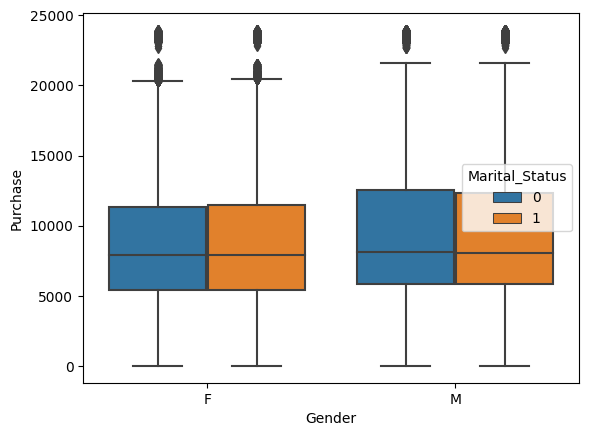

In [40]:
sns.boxplot(x='Gender', y='Purchase', hue= 'Marital_Status', data=df)
plt.show()

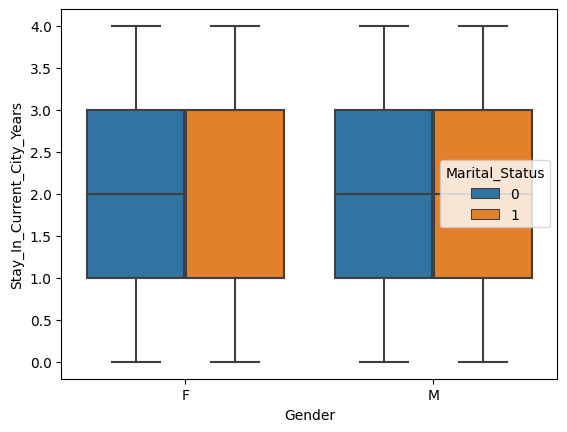

In [41]:
sns.boxplot(x='Gender', y='Stay_In_Current_City_Years', hue= 'Marital_Status', data=df)
plt.show()

In [42]:
df.head(1)

Gender   Age  Occupation City_Category  Stay_In_Current_City_Years  \
0      F  0-17          10             A                           2   

   Marital_Status  Product_Category  Purchase  
0               0                 3      8370

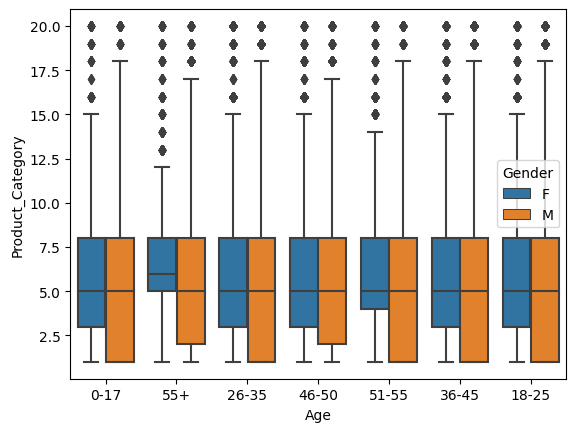

In [43]:
sns.boxplot(x='Age', y='Product_Category', hue= 'Gender', data=df)
plt.show()

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Gender                      550068 non-null  object
 1   Age                         550068 non-null  object
 2   Occupation                  550068 non-null  int64 
 3   City_Category               550068 non-null  object
 4   Stay_In_Current_City_Years  550068 non-null  int64 
 5   Marital_Status              550068 non-null  int64 
 6   Product_Category            550068 non-null  int64 
 7   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 33.6+ MB


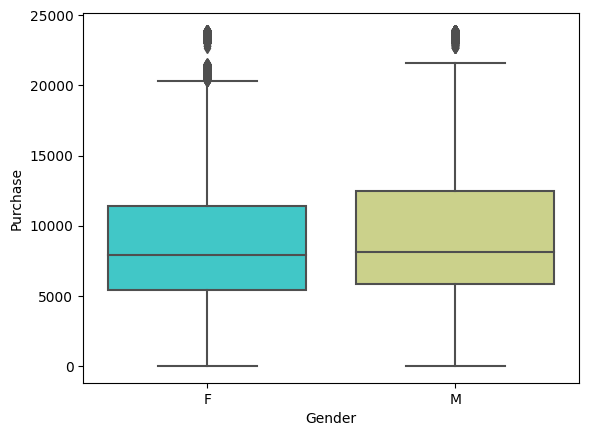

****************************************************************************************************
****************************************************************************************************


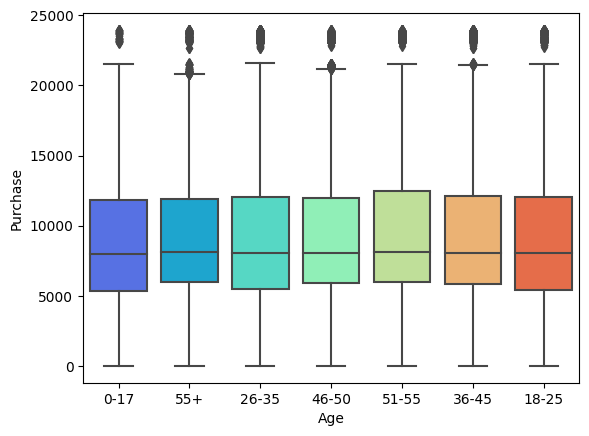

****************************************************************************************************
****************************************************************************************************


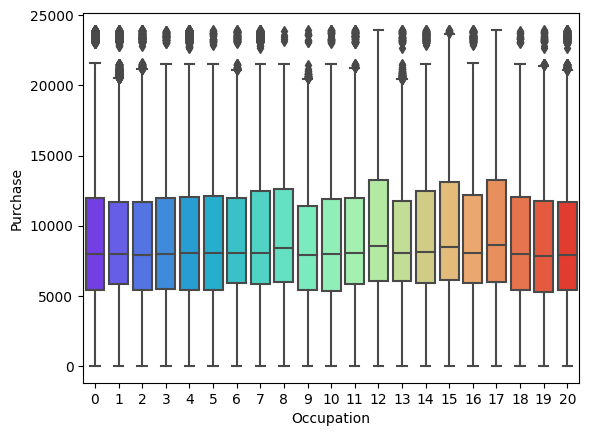

****************************************************************************************************
****************************************************************************************************


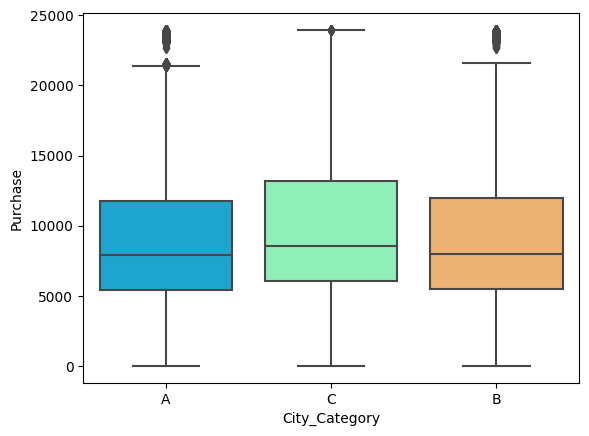

****************************************************************************************************
****************************************************************************************************


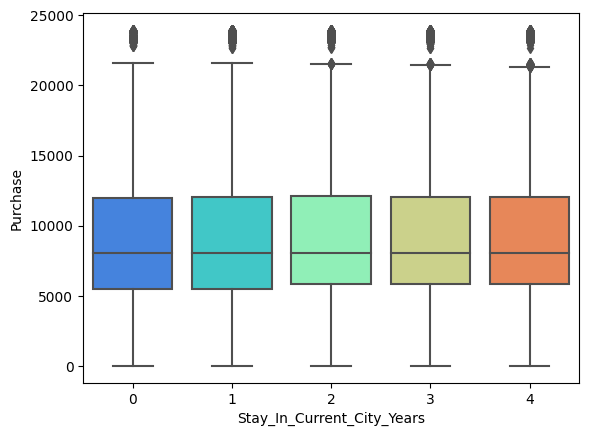

****************************************************************************************************
****************************************************************************************************


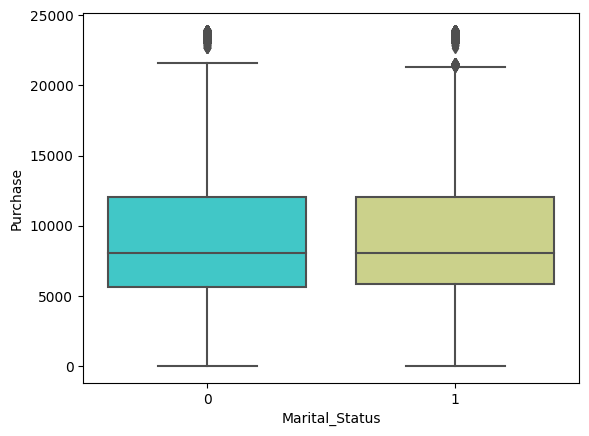

****************************************************************************************************
****************************************************************************************************


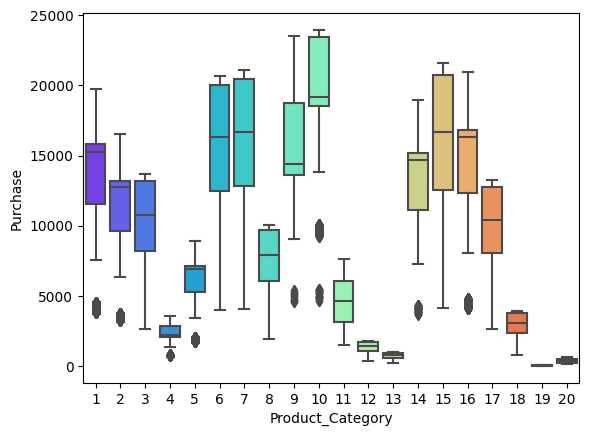

****************************************************************************************************
****************************************************************************************************


In [46]:
sns.boxplot(x = 'Gender', y='Purchase', data = df, palette='rainbow')
plt.show()
print('*'*100)
print('*'*100)


sns.boxplot(x = 'Age', y='Purchase', data=df, palette='rainbow')
plt.show()
print('*'*100)
print('*'*100)

sns.boxplot(x = 'Occupation', y='Purchase', data=df, palette='rainbow')
plt.show()
print('*'*100)
print('*'*100)

sns.boxplot(x = 'City_Category', y='Purchase', data=df, palette='rainbow')
plt.show()
print('*'*100)
print('*'*100)

sns.boxplot(x = 'Stay_In_Current_City_Years', y='Purchase', data=df, palette='rainbow')
plt.show()
print('*'*100)
print('*'*100)

sns.boxplot(x = 'Marital_Status', y='Purchase', data=df, palette='rainbow')
plt.show()
print('*'*100)
print('*'*100)

sns.boxplot(x = 'Product_Category', y='Purchase', data=df, palette='rainbow')
plt.show()
print('*'*100)
print('*'*100)


In [ ]:
# for i in df.columns:
#   print(df[i].describe())
#   print('*'*100)

In [47]:
print(df.describe())
print('*'*100)
print(df.info())

          Occupation  Stay_In_Current_City_Years  Marital_Status  \
count  550068.000000               550068.000000   550068.000000   
mean        8.076707                    1.858418        0.409653   
std         6.522660                    1.289443        0.491770   
min         0.000000                    0.000000        0.000000   
25%         2.000000                    1.000000        0.000000   
50%         7.000000                    2.000000        0.000000   
75%        14.000000                    3.000000        1.000000   
max        20.000000                    4.000000        1.000000   

       Product_Category       Purchase  
count     550068.000000  550068.000000  
mean           5.404270    9263.968713  
std            3.936211    5023.065394  
min            1.000000      12.000000  
25%            1.000000    5823.000000  
50%            5.000000    8047.000000  
75%            8.000000   12054.000000  
max           20.000000   23961.000000  
******************

In [ ]:
# mean = 8
# df["Occupation"] = np.where(df["Occupation"] >14, mean, df['Occupation'])
# df["Occupation"] = np.where(df["Occupation"] <2, mean, df['Occupation'])

# mean = 2
# df["Stay_In_Current_City_Years"] = np.where(df["Stay_In_Current_City_Years"] >3, mean, df['Stay_In_Current_City_Years'])
# df["Stay_In_Current_City_Years"] = np.where(df["Stay_In_Current_City_Years"] <1, mean, df['Stay_In_Current_City_Years'])

# mean = 9264
# df["Purchase"] = np.where(df["Purchase"] >12054, mean, df['Purchase'])
# df["Purchase"] = np.where(df["Purchase"] <5823, mean, df['Purchase'])

In [53]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [62]:
#df1 = df['Occupation'], 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category', 'Purchase']
q3, q1 = np.percentile(df['Occupation'], [75, 25])
print(q3, q1)
print(len(df['Occupation']))
IQR = q3 - q1
print(IQR)
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
print(upper_bound)
print(lower_bound)
random_data = df['Occupation'][df['Occupation'] < upper_bound]
random_data = df['Occupation'][df['Occupation'] > lower_bound]
print(len(df['Occupation']))
print('*'*100)


q3, q1 = np.percentile(df['Stay_In_Current_City_Years'], [75, 25])
print(q3, q1)
print(len(df['Stay_In_Current_City_Years']))
IQR = q3 - q1
print(IQR)
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
print(upper_bound)
print(lower_bound)
random_data = df['Stay_In_Current_City_Years'][df['Stay_In_Current_City_Years'] < upper_bound]
random_data = df['Stay_In_Current_City_Years'][df['Stay_In_Current_City_Years'] > lower_bound]
print(len(df['Stay_In_Current_City_Years']))
print('*'*100)


q3, q1 = np.percentile(df['Marital_Status'], [75, 25])
print(q3, q1)
print(len(df['Marital_Status']))
IQR = q3 - q1
print(IQR)
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
print(upper_bound)
print(lower_bound)
random_data = df['Marital_Status'][df['Marital_Status'] < upper_bound]
random_data = df['Marital_Status'][df['Marital_Status'] > lower_bound]
print(len(df['Marital_Status']))
print('*'*100)


q3, q1 = np.percentile(df['Product_Category'], [75, 25])
print(q3, q1)
print(len(df['Product_Category']))
IQR = q3 - q1
print(IQR)
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
print(upper_bound)
print(lower_bound)
random_data = df['Product_Category'][df['Product_Category'] < upper_bound]
random_data = df['Product_Category'][df['Product_Category'] > lower_bound]
print(len(df['Product_Category']))
print('*'*100)

q3, q1 = np.percentile(df['Purchase'], [75, 25])
print(q3, q1)
print(len(df['Purchase']))
IQR = q3 - q1
print(IQR)
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
print(upper_bound)
print(lower_bound)
random_data = df['Purchase'][df['Purchase'] < upper_bound]
random_data = df['Purchase'][df['Purchase'] > lower_bound]
print(len(df['Purchase']))
print('*'*100)

14.0 2.0
550068
12.0
32.0
-16.0
550068
****************************************************************************************************
3.0 1.0
550068
2.0
6.0
-2.0
550068
****************************************************************************************************
1.0 0.0
550068
1.0
2.5
-1.5
550068
****************************************************************************************************
8.0 1.0
550068
7.0
18.5
-9.5
550068
****************************************************************************************************
12054.0 5823.0
550068
6231.0
21400.5
-3523.5
550068
****************************************************************************************************


In [67]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)


print(df.describe())
print('*'*100)
print('*'*100)


skewValue = df.skew(axis=0)
print('Skewness : ', skewValue)
print('*'*100)

<ipython-input-67-b23e8280b765>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-67-b23e8280b765>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-67-b23e8280b765>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


(543238, 8)
          Occupation  Stay_In_Current_City_Years  Marital_Status  \
count  550068.000000               550068.000000   550068.000000   
mean        8.076707                    1.858418        0.409653   
std         6.522660                    1.289443        0.491770   
min         0.000000                    0.000000        0.000000   
25%         2.000000                    1.000000        0.000000   
50%         7.000000                    2.000000        0.000000   
75%        14.000000                    3.000000        1.000000   
max        20.000000                    4.000000        1.000000   

       Product_Category       Purchase  
count     550068.000000  550068.000000  
mean           5.404270    9263.968713  
std            3.936211    5023.065394  
min            1.000000      12.000000  
25%            1.000000    5823.000000  
50%            5.000000    8047.000000  
75%            8.000000   12054.000000  
max           20.000000   23961.000000  
******

<ipython-input-67-b23e8280b765>:13: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewValue = df.skew(axis=0)


1. A skewness value of 0 in the output denotes a symmetrical distribution of values in row 1.
2. A negative skewness value in the output indicates an asymmetry in the distribution corresponding to row 2 and the tail is larger towards the left hand side of the distribution.
3. A positive skewness value in the output indicates an asymmetry in the distribution corresponding to row 3 and the tail is larger towards the right hand side of the distribution.

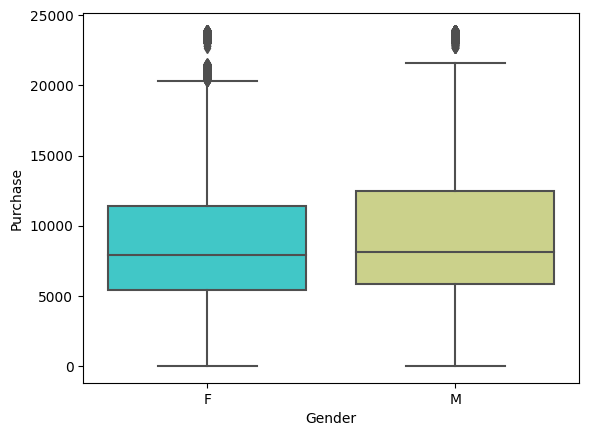

****************************************************************************************************
****************************************************************************************************


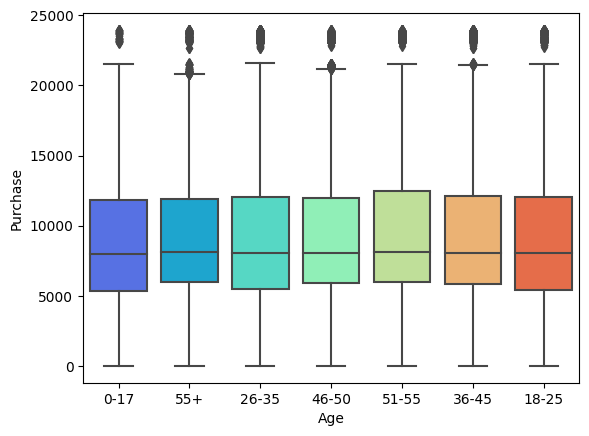

****************************************************************************************************
****************************************************************************************************


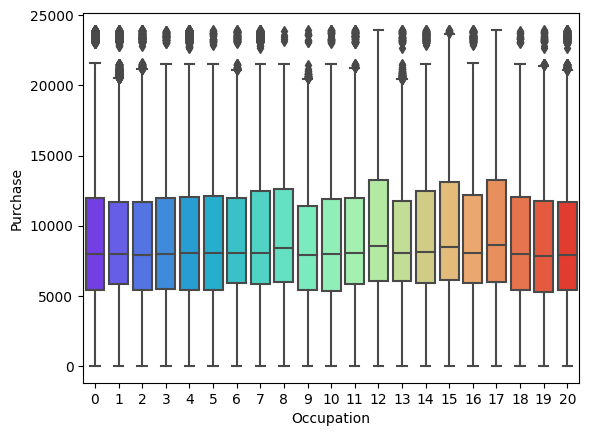

****************************************************************************************************
****************************************************************************************************


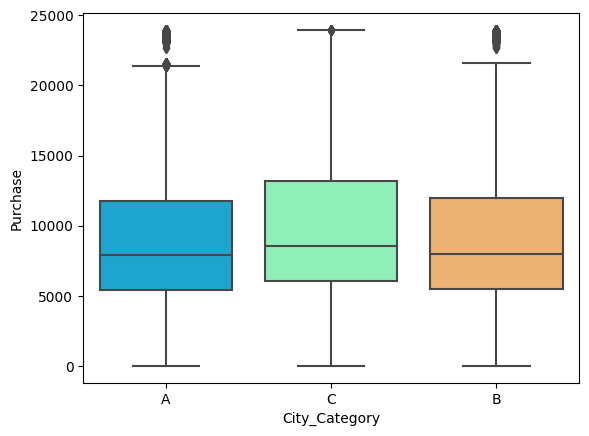

****************************************************************************************************
****************************************************************************************************


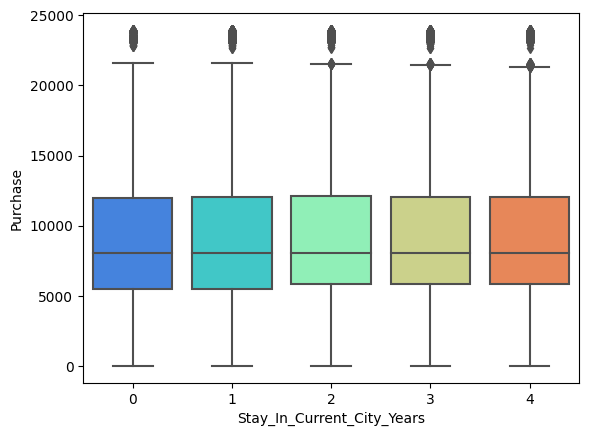

****************************************************************************************************
****************************************************************************************************


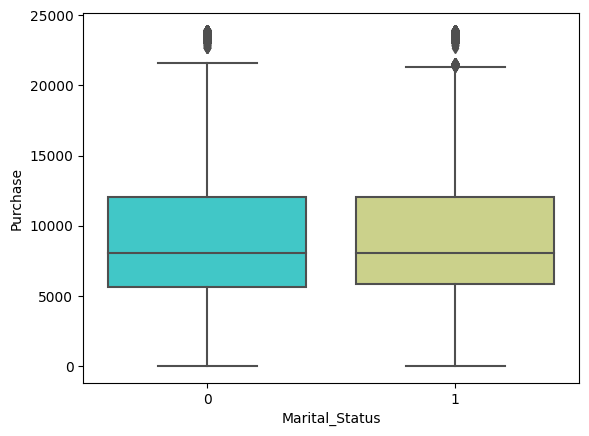

****************************************************************************************************
****************************************************************************************************


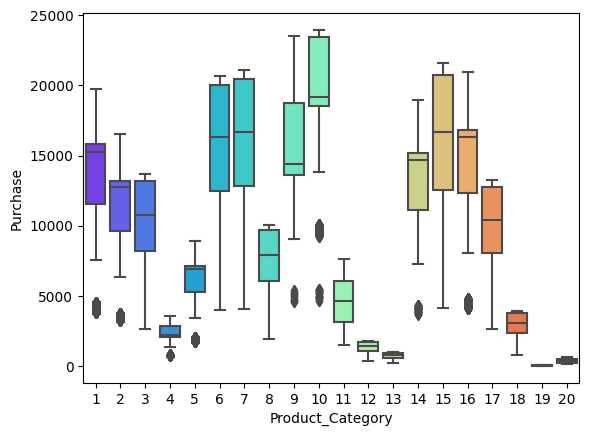

****************************************************************************************************
****************************************************************************************************


In [64]:
sns.boxplot(x = 'Gender', y='Purchase', data = df, palette='rainbow')
plt.show()
print('*'*100)
print('*'*100)


sns.boxplot(x = 'Age', y='Purchase', data=df, palette='rainbow')
plt.show()
print('*'*100)
print('*'*100)

sns.boxplot(x = 'Occupation', y='Purchase', data=df, palette='rainbow')
plt.show()
print('*'*100)
print('*'*100)

sns.boxplot(x = 'City_Category', y='Purchase', data=df, palette='rainbow')
plt.show()
print('*'*100)
print('*'*100)

sns.boxplot(x = 'Stay_In_Current_City_Years', y='Purchase', data=df, palette='rainbow')
plt.show()
print('*'*100)
print('*'*100)

sns.boxplot(x = 'Marital_Status', y='Purchase', data=df, palette='rainbow')
plt.show()
print('*'*100)
print('*'*100)

sns.boxplot(x = 'Product_Category', y='Purchase', data=df, palette='rainbow')
plt.show()
print('*'*100)
print('*'*100)


  Gender  Stay_In_Current_City_Years     Purchase
0      F                           0  8606.040497
3      F                           3  8695.236582
2      F                           2  8740.516357
1      F                           1  8775.052244
4      F                           4  8784.883738
5      M                           0  9350.908869
9      M                           4  9413.589778
6      M                           1  9421.145380
8      M                           3  9491.916315
7      M                           2  9502.486091
****************************************************************************************************


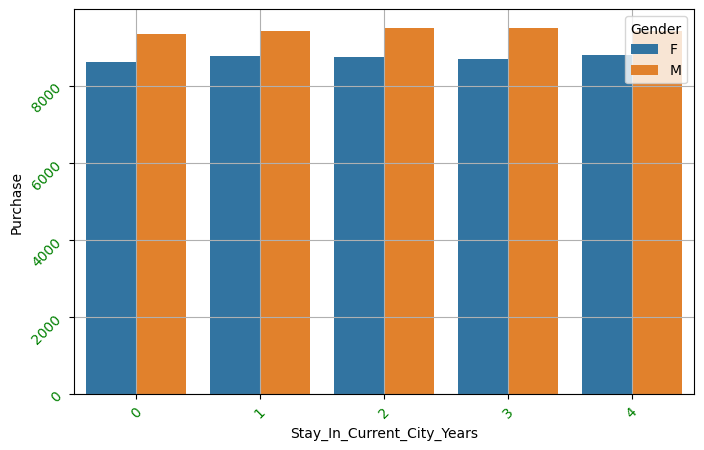

In [91]:
A = df.groupby(['Gender', 'Stay_In_Current_City_Years']).agg({'Purchase':'mean'}).reset_index().sort_values(by = 'Purchase', ascending = True)
print(A)
print('**'*50)

from seaborn._core.properties import FontSize
plt.figure(figsize = (8, 5))
sns.barplot(data = A,
            x = 'Stay_In_Current_City_Years',
            y = 'Purchase',
            hue = 'Gender'
            )
plt.xticks(rotation = 45, fontsize = 10, color = 'green')
plt.yticks(rotation = 45, fontsize = 10, color = 'green')
plt.grid()
plt.show()

   Gender  Occupation      Purchase
10      F          10   8194.751187
20      F          20   8333.784587
2       F           2   8409.951327
19      F          19   8431.903818
1       F           1   8496.815280
4       F           4   8536.909677
13      F          13   8562.755674
14      F          14   8577.563212
9       F           9   8592.587198
40      M          19   8797.868870
5       F           5   8826.599099
0       F           0   8827.508447
16      F          16   8965.212320
41      M          20   9015.452547
3       F           3   9055.138149
6       F           6   9078.405882
11      F          11   9090.800000
7       F           7   9092.302553
39      M          18   9137.093398
12      F          12   9155.953301
23      M           2   9213.158472
30      M           9   9226.694196
21      M           0   9228.799538
22      M           1   9231.961755
32      M          11   9232.145350
24      M           3   9279.059603
31      M          10   9302

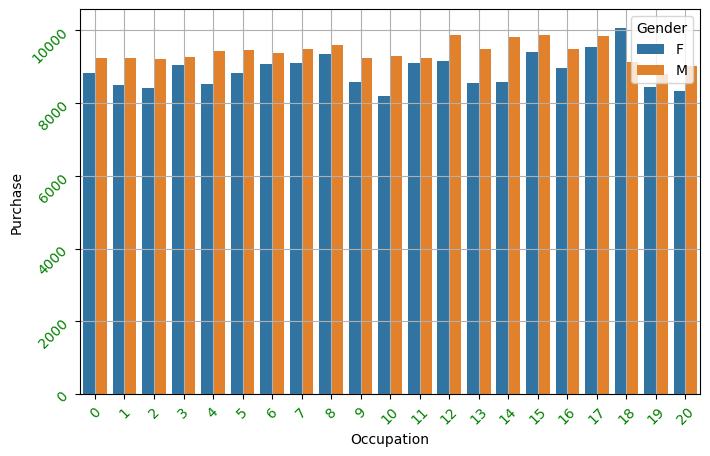

In [96]:
A = df.groupby(['Gender', 'Occupation']).agg({'Purchase':'mean'}).reset_index().sort_values(by = 'Purchase', ascending = True)
print(A)
print('**'*50)

from seaborn._core.properties import FontSize
plt.figure(figsize = (8, 5))
sns.barplot(data = A,
            x = 'Occupation',
            y = 'Purchase',
            hue = 'Gender'
            )
plt.xticks(rotation = 45, fontsize = 10, color = 'green')
plt.yticks(rotation = 45, fontsize = 10, color = 'green')
plt.grid()
plt.show()

  Gender  Marital_Status     Purchase
0      F               0  8679.845815
1      F               1  8810.249789
3      M               1  9413.817605
2      M               0  9453.756740
****************************************************************************************************


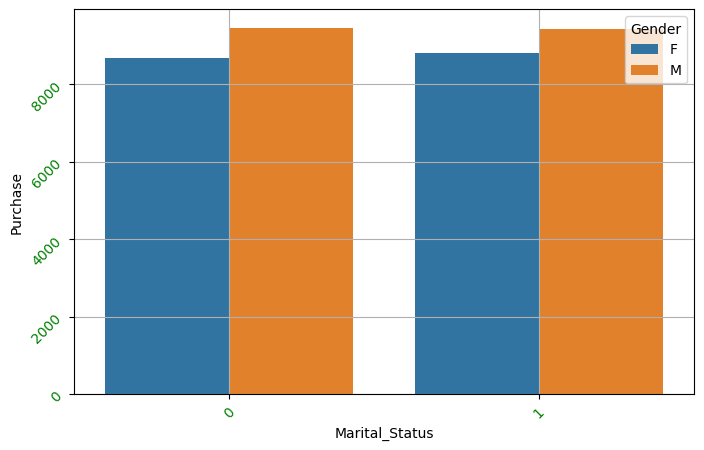

In [93]:
A = df.groupby(['Gender', 'Marital_Status']).agg({'Purchase':'mean'}).reset_index().sort_values(by = 'Purchase', ascending = True)
print(A)
print('**'*50)

from seaborn._core.properties import FontSize
plt.figure(figsize = (8, 5))
sns.barplot(data = A,
            x = 'Marital_Status',
            y = 'Purchase',
            hue = 'Gender'
            )
plt.xticks(rotation = 45, fontsize = 10, color = 'green')
plt.yticks(rotation = 45, fontsize = 10, color = 'green')
plt.grid()
plt.show()

In [92]:
df.head(1)

Gender   Age  Occupation City_Category  Stay_In_Current_City_Years  \
0      F  0-17          10             A                           2   

   Marital_Status  Product_Category  Purchase  
0               0                 3      8370